# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">House Price Prediction</div>

# Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Importing

In [2]:
train_data=pd.read_csv('https://raw.githubusercontent.com/Bhavanish19/Housing_pred_sfk/main/train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/Bhavanish19/Housing_pred_sfk/main/test.csv')

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Data Preprocessing

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking null value
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Handling null values

In [24]:
#Train Data
column_with_null=train_data.columns[train_data.isnull().any()]
column_with_null

Index([], dtype='object')

In [26]:
# Differentiate between numerical and categorical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns
categorical_columns = train_data.select_dtypes(exclude=['number']).columns


In [28]:
numerical_columns_with_null = [col for col in column_with_null if col in numerical_columns]
categorical_columns_with_null = [col for col in column_with_null if col in categorical_columns]

In [30]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
# Handling null values in numerical and categorical columns
null_cols = numerical_columns_with_null + categorical_columns_with_null
for col in null_cols:
    if col in numerical_columns_with_null:
        # Replace null values with median for numerical columns
        train_data[col].fillna(train_data[col].median(), inplace=True)
    else:
        # Replace null values with most frequent category (mode) for categorical columns
        train_data[col].fillna(train_data[col].mode().iloc[0], inplace=True)

In [35]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Handling Null values in Test Data

In [36]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [37]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

### Differentiate between numerical and categorical columns

In [38]:
numerical=test_data.select_dtypes(include=['number']).columns
categorical=test_data.select_dtypes(exclude=['number']).columns

In [39]:
numerical

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [40]:
categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
# Handling null values in numerical and categorical columns
null_cols = numerical_columns_with_null + categorical_columns_with_null
for col in null_cols:
    if col in numerical_columns_with_null:
        # Replace null values with median for numerical columns
        test_data[col].fillna(test_data[col].median(), inplace=True)
    else:
        # Replace null values with most frequent category (mode) for categorical columns
        test_data[col].fillna(test_data[col].mode().iloc[0], inplace=True)

In [42]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# Data is cleaned

In [43]:
# Checking Unique values
for i in train_data.columns:
    print(i,':',train_data[i].nunique())

Id : 1460
MSSubClass : 15
MSZoning : 5
LotFrontage : 110
LotArea : 1073
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 3
MasVnrArea : 327
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 5
GarageType : 6
GarageYrBlt : 97
GarageFinish : 3
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
PavedDr

In [44]:
data=pd.concat((train_data,test_data)).reset_index(drop=True)


# Data Visualization

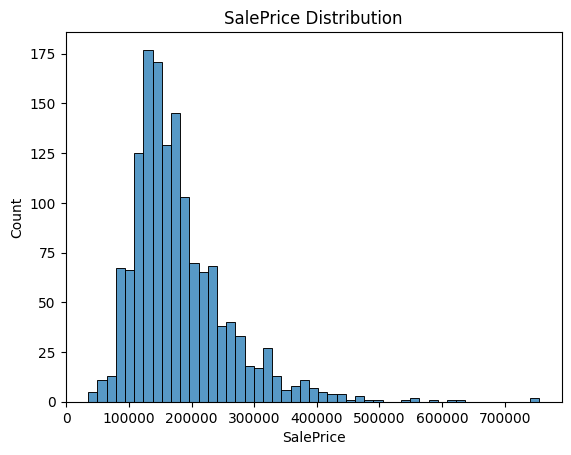

In [45]:
sns.histplot(x='SalePrice',data=train_data)
plt.title('SalePrice Distribution')
plt.show()

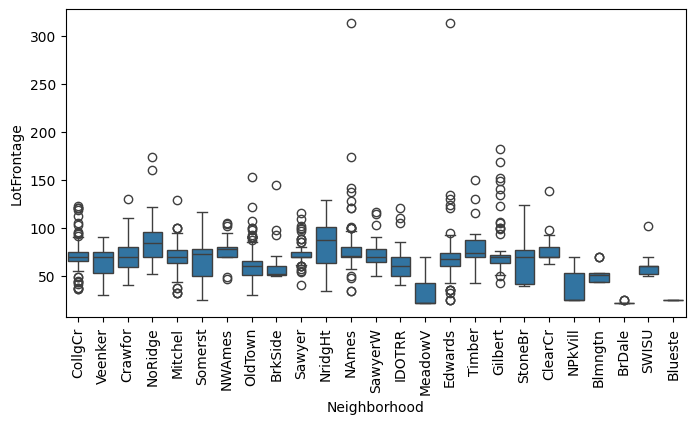

In [46]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(x = "Neighborhood", y = "LotFrontage", data = train_data)
plt.xticks(rotation = 90)
plt.show()

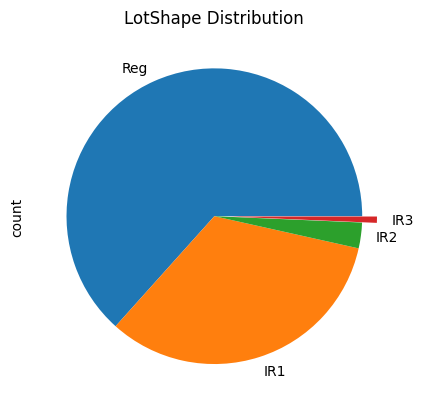

In [47]:
train_data['LotShape'].value_counts().plot(kind='pie',explode=(0,0,0,0.1))
plt.title('LotShape Distribution')
plt.show()

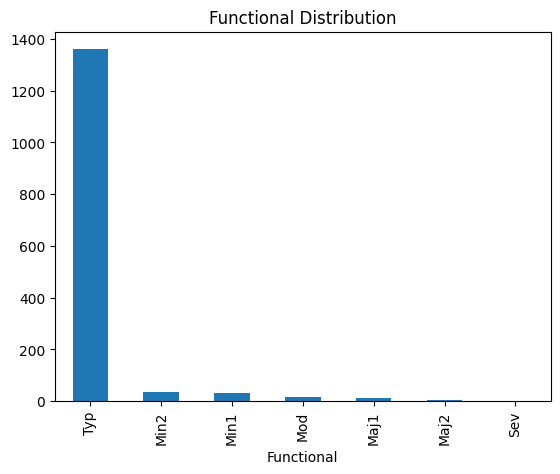

In [48]:
train_data['Functional'].value_counts().plot(kind='bar')
plt.title('Functional Distribution')
plt.show()

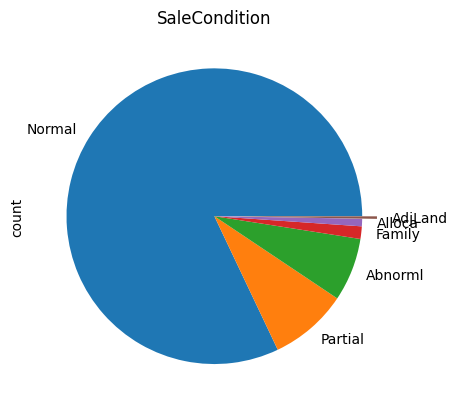

In [49]:
train_data['SaleCondition'].value_counts().plot(kind='pie',explode=(0,0,0,0,0,0.1))
plt.title('SaleCondition')
plt.show()

In [50]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

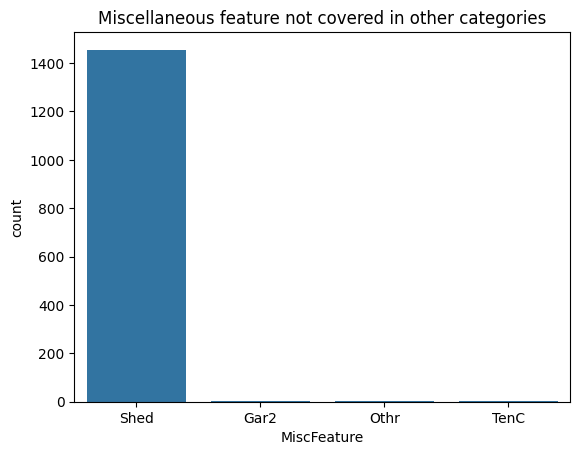

In [51]:
sns.countplot(x='MiscFeature',data=train_data)
plt.title('Miscellaneous feature not covered in other categories')
plt.show()

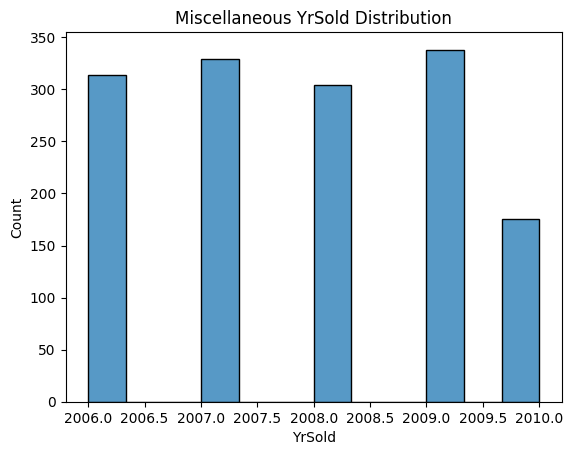

In [52]:
sns.histplot(x='YrSold',data=train_data)
plt.title('Miscellaneous YrSold Distribution')
plt.show()

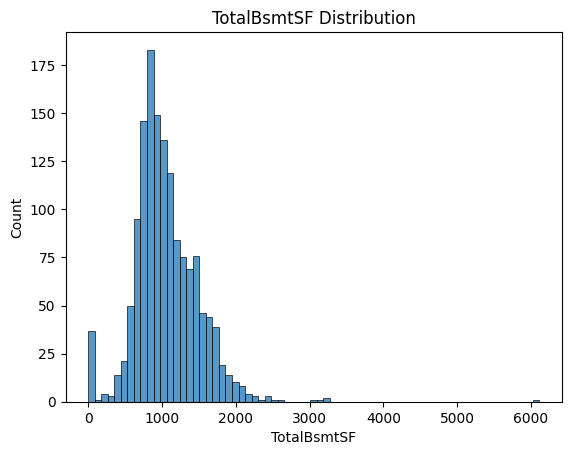

In [53]:
sns.histplot(x='TotalBsmtSF',data=train_data)
plt.title('TotalBsmtSF Distribution')
plt.show()

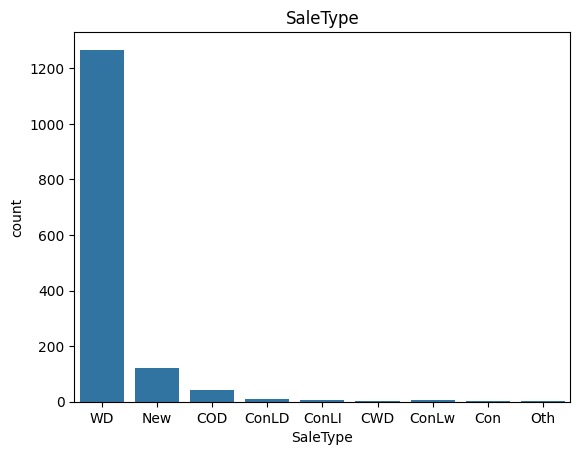

In [54]:
sns.countplot(x='SaleType',data=train_data)
plt.title('SaleType')
plt.show()

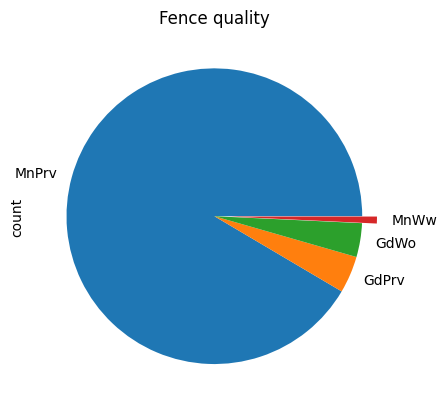

In [55]:
train_data['Fence'].value_counts().plot(kind='pie',explode=(0,0,0,0.1))
plt.title('Fence quality')
plt.show()

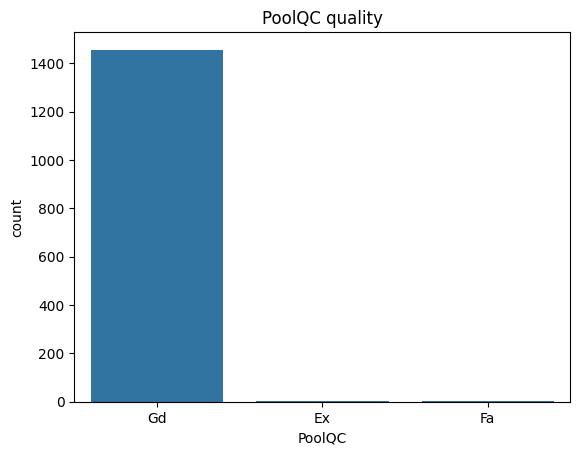

In [56]:
sns.countplot(x='PoolQC',data=train_data)
plt.title('PoolQC quality')
plt.show()

# Feature Engineering

In [57]:
#Age of the property
train_data['AGE_OF_PPT'] = train_data['YrSold'] - train_data['YearBuilt']
test_data['AGE_OF_PPT'] = test_data['YrSold'] - test_data['YearBuilt']

In [58]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
data=pd.concat((train_data,test_data)).reset_index(drop=True)


In [60]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AGE_OF_PPT
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500.0,5
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500.0,31
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500.0,7
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0,91
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,36
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,36
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,46
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,14


# Model Building

In [61]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AGE_OF_PPT
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125,60


In [62]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AGE_OF_PPT
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,49
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,52
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,13
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,12
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,36
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,36
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,46
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,14


In [63]:
train_n=train_data.shape[0]

In [64]:
train_n

1460

In [65]:
y=train_data['SalePrice']

In [66]:
categorical=data.dtypes[train_data.dtypes=='object']
categorical

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [67]:
categorical=data[categorical.index]

In [68]:
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


# LabelEncoder

In [69]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')



In [70]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in cols:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str))

remain_categorical=data.dtypes[data.dtypes=='object']
remain_categorical

MSZoning         object
LandContour      object
Utilities        object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
Foundation       object
Heating          object
Electrical       object
GarageType       object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [71]:
data.shape

(2919, 82)

# One Hot Encoding

In [72]:
n_data=pd.get_dummies(data)

In [73]:
n_data

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,0,3,0,7,5,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,1,0,3,0,6,8,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,1,0,0,0,7,5,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,1,0,0,0,7,5,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,1,0,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,2,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,2,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,2,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,2,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


In [74]:
n_data.shape

(2919, 222)

In [75]:
train = n_data.iloc[:train_n]


In [76]:
test = n_data.iloc[train_n:]

In [77]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,1,2,3,0,5,6,...,False,False,False,True,False,False,False,False,True,False
1461,1462,20,81.0,14267,1,2,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1462,1463,60,74.0,13830,1,2,0,0,5,5,...,False,False,False,True,False,False,False,False,True,False
1463,1464,60,78.0,9978,1,2,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1464,1465,120,43.0,5005,1,2,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,2,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,2,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,2,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,2,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


In [78]:
train.shape

(1460, 222)

In [79]:
train=train.drop('SalePrice',axis=1)

In [80]:
test=test.drop('SalePrice',axis=1)

In [81]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,1,2,3,0,5,6,...,False,False,False,True,False,False,False,False,True,False
1461,1462,20,81.0,14267,1,2,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1462,1463,60,74.0,13830,1,2,0,0,5,5,...,False,False,False,True,False,False,False,False,True,False
1463,1464,60,78.0,9978,1,2,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1464,1465,120,43.0,5005,1,2,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,2,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,2,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,2,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,2,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


In [82]:
test.shape

(1459, 221)

In [83]:
X=train
Y=y

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# RandomForestRegressor

In [85]:
# Create and train the Random Forest regressor
randomforest_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
randomforest_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [86]:
# Make predictions
y_pred = randomforest_regressor.predict(X_test)

In [87]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (Random Forest Regressor):", mse)
r2_RF = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RF:.4f}')

Mean Squared Error (Random Forest Regressor): 29202.13834347416
R-squared: 0.8888


In [88]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(randomforest_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive MSE values
scores = -scores

# Print the cross-validation scores
print("Cross-Validation Mean Squared Error (Random Forest Regressor):")
print(scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_mse = scores.mean()
std_mse = scores.std()

print("Mean Cross-Validation MSE:", mean_mse)
print("Standard Deviation of Cross-Validation MSE:", std_mse)

Cross-Validation Mean Squared Error (Random Forest Regressor):
[8.70075059e+08 1.29685541e+09 1.39691913e+09 6.70084861e+08
 6.54897163e+08]
Mean Cross-Validation MSE: 977766323.7331762
Standard Deviation of Cross-Validation MSE: 312415333.32461643


In [89]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,1,2,3,0,5,6,...,False,False,False,True,False,False,False,False,True,False
1461,1462,20,81.0,14267,1,2,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1462,1463,60,74.0,13830,1,2,0,0,5,5,...,False,False,False,True,False,False,False,False,True,False
1463,1464,60,78.0,9978,1,2,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1464,1465,120,43.0,5005,1,2,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,2,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,2,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,2,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,2,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


# xgboost

In [90]:
import xgboost as xgb
# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

In [91]:
# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [92]:
# Make predictions
y_pred = xgb_regressor.predict(X_test)


In [93]:
# Calculate Mean Squared Error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {mse:.4f}')
r2_XG = r2_score(y_test, y_pred)
print(f'R-squared: {r2_XG:.4f}')

RMSE: 26864.4526
R-squared: 0.9059


In [94]:
test_pred = xgb_regressor.predict(test)

In [95]:
test_pred

array([133057.16, 164066.52, 171867.44, ..., 168550.45, 125914.92,
       221937.72], dtype=float32)

In [96]:
importance_scores = xgb_regressor.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(X.columns, importance_scores))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

OverallQual: 0.38386794924736023
LandContour_Bnk: 0.06156069040298462
GarageCars: 0.05762408301234245
GrLivArea: 0.05008035898208618
GarageType_Detchd: 0.039548132568597794
LowQualFinSF: 0.025808043777942657
CentralAir: 0.025595616549253464
GarageFinish: 0.02423745021224022
KitchenAbvGr: 0.019539237022399902
BsmtQual: 0.01850242353975773
MSZoning_RM: 0.01816544495522976
TotalBsmtSF: 0.0166104007512331
Functional: 0.01466579269617796
Exterior2nd_VinylSd: 0.01144323032349348
2ndFlrSF: 0.011001349426805973
KitchenQual: 0.010743885301053524
BsmtFinSF1: 0.01031397469341755
TotRmsAbvGrd: 0.010283627547323704
Fireplaces: 0.009620285592973232
ExterQual: 0.008675687946379185
1stFlrSF: 0.007145674433559179
Heating_GasA: 0.007114740554243326
Neighborhood_OldTown: 0.006861050147563219
Neighborhood_Crawfor: 0.006585989613085985
GarageType_BuiltIn: 0.0063405269756913185
PoolArea: 0.006123674102127552
YearBuilt: 0.00529829878360033
HouseStyle_1.5Fin: 0.005028677172958851
OverallCond: 0.00469327531754

# Submission

In [97]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = test_pred
sub.to_csv('submission.csv',index=False)

In [98]:
sub.to_csv('submission.csv', index=False)

# Building AutoML model

In [99]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.5 MB/s eta 0:00:00


In [100]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvcs1hjy8
  JVM stdout: /tmp/tmpvcs1hjy8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvcs1hjy8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_mki28c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [101]:
train_data=pd.read_csv('https://raw.githubusercontent.com/Bhavanish19/Housing_pred_sfk/main/train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/Bhavanish19/Housing_pred_sfk/main/test.csv')

train_data = h2o.H2OFrame(train_data)
test_data = h2o.H2OFrame(test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [102]:
# Initialising model
RANDOM_STATE = 12
RUNTIME = 60  # 3 Hours
N_FOLDS = 5

# Get the feature columns
feature_cols = [col for col in train_data.columns if col not in ['SalePrice', 'Id']]


In [103]:
# Initialize and train the H2OAutoML model
aml = H2OAutoML(nfolds=N_FOLDS, seed=RANDOM_STATE, max_runtime_secs=RUNTIME)
aml.train(x=feature_cols, y="SalePrice", training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/8
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [104]:
lb = aml.leaderboard
lb.head(10)

In [108]:
# Assuming 'aml' is your AutoML object and 'test_data' is your H2O Frame containing the test data
preds = aml.leader.predict(test_data)

# Converting the predictions to a pandas DataFrame
sub = preds.as_data_frame()  # Convert directly the preds H2O Frame to DataFrame if 'preds' is the prediction

# Create a new DataFrame or ensure 'subs' exists if you intended to use it
subs = pd.DataFrame()
subs['SalePrice'] = sub['predict']  # Assuming 'predict' is the column in 'sub' containing the prediction

# Saving the DataFrame to a CSV file
subs.to_csv('h2o.ai-automl.csv', index=False)

# Displaying the first few rows of the DataFrame
print(subs.head())

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
       SalePrice
0  118304.262579
1  146879.185941
2  175578.233945
3  184113.509822
4  199398.121414


/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'MSZoning' has levels not trained on: ["nan"]
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'Utilities' has levels not trained on: ["nan"]
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'Exterior1st' has levels not trained on: ["nan"]
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'Exterior2nd' has levels not trained on: ["nan"]
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'KitchenQual' has levels not trained on: ["nan"]
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'Functional' has levels not trained on: ["nan"]
  warnings.warn(w)
/usr